In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
trash=pd.read_csv('../data/trash_hauler_report.csv')

In [3]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [4]:
trash.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [5]:
trash=trash.rename(columns= {'Request ': 'Request'})

In [6]:
trash.columns

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [7]:
trash.isnull().sum()

Request Number        0
Date Opened           0
Request               0
Description          31
Incident Address      9
Zip Code             75
Trash Hauler        901
Trash Route         947
Council District     49
State Plan X         28
State Plan Y         28
dtype: int64

In [8]:
trash['Zip Code']=trash['Zip Code'].fillna(-1).astype(int)

In [9]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [10]:
trash['Council District']=trash['Council District'].fillna(-1).astype(int)

In [11]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [12]:
trash['Incident Address']= trash['Incident Address'].str.upper()

In [13]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 OLD MATTHEWS RD,37207,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187


In [14]:
address_split=trash['Incident Address'].str.split(',', expand=True)

In [15]:
address_split

,0,1,2,3,4
0,3817 CROUCH DR,None,None,None,None
1,4028 CLARKSVILLE PIKE,None,None,None,None
2,6528 THUNDERBIRD DR,None,None,None,None
3,2603 OLD MATTHEWS RD,None,None,None,None
4,604 CROLEY DR,None,None,None,None
...,...,...,...,...,...
20221,2731 MURFREESBORO PIKE,None,None,None,None
20222,1621 LONG AVE,NASHVILLE,TN 37206,UNITED STATES,None
20223,2943 WINDEMERE CIR,NASHVILLE,TN 37214,UNITED STATES,None
20224,3325 MURFREESBORO PIKE,NASHVILLE,TN 37013,UNITED STATES,None


In [16]:
address_split=address_split.drop(columns=[1,3,4])

In [17]:
address_split

,0,2
0,3817 CROUCH DR,None
1,4028 CLARKSVILLE PIKE,None
2,6528 THUNDERBIRD DR,None
3,2603 OLD MATTHEWS RD,None
4,604 CROLEY DR,None
...,...,...
20221,2731 MURFREESBORO PIKE,None
20222,1621 LONG AVE,TN 37206
20223,2943 WINDEMERE CIR,TN 37214
20224,3325 MURFREESBORO PIKE,TN 37013


In [18]:
street_split= address_split[0].str.split(' ', n=1, expand=True)

In [19]:
street_split

,0,1
0,3817,CROUCH DR
1,4028,CLARKSVILLE PIKE
2,6528,THUNDERBIRD DR
3,2603,OLD MATTHEWS RD
4,604,CROLEY DR
...,...,...
20221,2731,MURFREESBORO PIKE
20222,1621,LONG AVE
20223,2943,WINDEMERE CIR
20224,3325,MURFREESBORO PIKE


In [20]:
street_split=street_split.rename(columns={0:'Door Number', 1:'Street'})

In [21]:
street_split

,Door Number,Street
0,3817,CROUCH DR
1,4028,CLARKSVILLE PIKE
2,6528,THUNDERBIRD DR
3,2603,OLD MATTHEWS RD
4,604,CROLEY DR
...,...,...
20221,2731,MURFREESBORO PIKE
20222,1621,LONG AVE
20223,2943,WINDEMERE CIR
20224,3325,MURFREESBORO PIKE


In [22]:
street_split['Code']= address_split[2]

In [23]:
street_split

,Door Number,Street,Code
0,3817,CROUCH DR,None
1,4028,CLARKSVILLE PIKE,None
2,6528,THUNDERBIRD DR,None
3,2603,OLD MATTHEWS RD,None
4,604,CROLEY DR,None
...,...,...,...
20221,2731,MURFREESBORO PIKE,None
20222,1621,LONG AVE,TN 37206
20223,2943,WINDEMERE CIR,TN 37214
20224,3325,MURFREESBORO PIKE,TN 37013


In [24]:
zip_split=street_split['Code'].str.split(' ', expand=True)

In [25]:
zip_split=zip_split[[2]]

In [26]:
street_split['Code']=zip_split[2]

In [27]:
street_split

,Door Number,Street,Code
0,3817,CROUCH DR,None
1,4028,CLARKSVILLE PIKE,None
2,6528,THUNDERBIRD DR,None
3,2603,OLD MATTHEWS RD,None
4,604,CROLEY DR,None
...,...,...,...
20221,2731,MURFREESBORO PIKE,None
20222,1621,LONG AVE,37206
20223,2943,WINDEMERE CIR,37214
20224,3325,MURFREESBORO PIKE,37013


In [28]:
trash['Door Number']=street_split['Door Number']

In [29]:
trash['Street']=street_split['Street']

In [30]:
trash['Code']=street_split['Code']

In [31]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,None
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,None
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,None
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 OLD MATTHEWS RD,37207,WASTE IND,2206,2,1.735692e+06,685027.245923,2603,OLD MATTHEWS RD,None
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,None
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206,METRO,9508,6,1.749711e+06,669201.601569,1621,LONG AVE,37206
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,37214
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,37013


In [32]:
trash.loc[trash['Zip Code']==-1]

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code
169,26871,11/08/17,Trash - Backdoor,missed back door,4203 KENNEDY AVE,-1,RED RIVER,2203,-1,NaN,NaN,4203,KENNEDY AVE,None
625,33128,12/13/17,Trash - Curbside/Alley Missed Pickup,Missed.,NaN,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
875,35857,12/29/17,Trash - Curbside/Alley Missed Pickup,daughters car parked in front,NaN,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
876,35875,12/29/17,Trash - Backdoor,missed pickup,1319 SATURN DR,-1,RED RIVER,1402,-1,1.762116e+06,651014.498639,1319,SATURN DR,None
973,36981,01/04/18,Trash - Backdoor,cart still out 3425 meadow lake ter,3425 MEADOWLAKE TER,-1,RED RIVER,3501,-1,1.787832e+06,641084.550488,3425,MEADOWLAKE TER,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,243647,09/07/19,Trash - Curbside/Alley Missed Pickup,Not the only one not collected,"5005 JONQUILLA DR, ALPHARETTA, GA 30004, UNITE...",-1,NaN,NaN,-1,2.472183e+06,-86770.273874,5005,JONQUILLA DR,30004
18510,250915,09/24/19,Trash - Curbside/Alley Missed Pickup,Every week the same thing. I hope I can find a...,"110 GEORGE L DAVIS BLVD, NASHVILLE, TENNESSEE,...",-1,NaN,NaN,19,1.735557e+06,664655.200967,110,GEORGE L DAVIS BLVD,None
19946,263533,10/24/19,Trash - Curbside/Alley Missed Pickup,test,"788 LEBANON PIKE, NASHVILLE, TN 37210, UNITED ...",-1,NaN,NaN,-1,NaN,NaN,788,LEBANON PIKE,37210
20026,264459,10/25/19,Trash - Curbside/Alley Missed Pickup,Test,"5213 ROBERT JAMES DR, MURFREESBORO, TN 37129, USA",-1,NaN,NaN,-1,1.851611e+06,585955.293803,5213,ROBERT JAMES DR,37129


In [33]:
for index, row in trash.iterrows():
    if row['Zip Code'] == -1:
        trash.loc[index, 'Zip Code'] = trash.loc[index, 'Code']
    else:
       trash.loc[index, 'Zip Code'] = trash.loc[index, 'Zip Code']

C:\Users\graft\AppData\Local\Temp\ipykernel_108340\903559375.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37013' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  trash.loc[index, 'Zip Code'] = trash.loc[index, 'Code']


In [34]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 CROUCH DR,37207.0,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,None
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 CLARKSVILLE PIKE,37218.0,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,None
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 THUNDERBIRD DR,37209.0,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,None
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 OLD MATTHEWS RD,37207.0,WASTE IND,2206,2,1.735692e+06,685027.245923,2603,OLD MATTHEWS RD,None
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 CROLEY DR,37209.0,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013.0,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,None
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206.0,METRO,9508,6,1.749711e+06,669201.601569,1621,LONG AVE,37206
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214.0,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,37214
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013.0,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,37013


In [35]:
trash['Zip Code']=trash['Zip Code'].fillna(-1).astype(int)

In [36]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,None
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,None
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,None
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 OLD MATTHEWS RD,37207,WASTE IND,2206,2,1.735692e+06,685027.245923,2603,OLD MATTHEWS RD,None
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,None
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206,METRO,9508,6,1.749711e+06,669201.601569,1621,LONG AVE,37206
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,37214
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,37013


In [37]:
trash['Request']=trash['Request'].str.upper()

In [38]:
trash['Description']=trash['Description'].str.upper()

In [39]:
trash['Request']=trash['Request'].str.contains('MISS').astype(int)

In [40]:
trash['Description_Code']=0
for index, row in trash.iterrows():
    if pd.isna(row['Description']):
        trash.at[index,'Description_Code'] = 0
    elif 'MISS' in row['Description']:
        trash.at[index,'Description_Code'] = 1


In [41]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code,Description_Code
0,25270,11/01/17,0,"HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DR...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,None,0
1,25274,11/01/17,1,CURB/TRASH MISS TUESDAY.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,None,1
2,25276,11/01/17,1,CURB/TRASH MISS TUESDAY.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,None,1
3,25307,11/01/17,1,MISSED,2603 OLD MATTHEWS RD,37207,WASTE IND,2206,2,1.735692e+06,685027.245923,2603,OLD MATTHEWS RD,None,1
4,25312,11/01/17,1,MISSED THE EVEN SIDE OF THE ROAD.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,1,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,None,1
20222,267126,11/01/19,1,ENTIRE ALLEY,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206,METRO,9508,6,1.749711e+06,669201.601569,1621,LONG AVE,37206,0
20223,267130,11/01/19,1,MISSED SEVERAL,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,37214,1
20224,267134,11/01/19,1,CALLER STATED TRASH WAS MISSED & WERE ONLY PIC...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,37013,1


In [42]:
trash['concat']=trash['Request']+trash['Description_Code']

In [43]:


for index, row in trash.iterrows():
    if trash.loc[index, 'concat'] == 0:
        trash.loc[index, 'complaint'] =0
    else:
        trash.loc[index, 'complaint'] = 1

In [44]:
trash['complaint']=trash['complaint'].astype(int)

In [45]:
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code,Description_Code,concat,complaint
0,25270,11/01/17,0,"HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DR...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,None,0,0,0
1,25274,11/01/17,1,CURB/TRASH MISS TUESDAY.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,None,1,2,1
2,25276,11/01/17,1,CURB/TRASH MISS TUESDAY.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,None,1,2,1
3,25307,11/01/17,1,MISSED,2603 OLD MATTHEWS RD,37207,WASTE IND,2206,2,1.735692e+06,685027.245923,2603,OLD MATTHEWS RD,None,1,2,1
4,25312,11/01/17,1,MISSED THE EVEN SIDE OF THE ROAD.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,None,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,1,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,None,1,2,1
20222,267126,11/01/19,1,ENTIRE ALLEY,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206,METRO,9508,6,1.749711e+06,669201.601569,1621,LONG AVE,37206,0,1,1
20223,267130,11/01/19,1,MISSED SEVERAL,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,37214,1,2,1
20224,267134,11/01/19,1,CALLER STATED TRASH WAS MISSED & WERE ONLY PIC...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,37013,1,2,1


In [46]:
final_trash=trash.drop(columns = ['concat', 'Description_Code', 'Request'])

In [47]:
final_trash

,Request Number,Date Opened,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,Code,complaint
0,25270,11/01/17,"HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DR...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,None,0
1,25274,11/01/17,CURB/TRASH MISS TUESDAY.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,None,1
2,25276,11/01/17,CURB/TRASH MISS TUESDAY.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,None,1
3,25307,11/01/17,MISSED,2603 OLD MATTHEWS RD,37207,WASTE IND,2206,2,1.735692e+06,685027.245923,2603,OLD MATTHEWS RD,None,1
4,25312,11/01/17,MISSED THE EVEN SIDE OF THE ROAD.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,None,1
20222,267126,11/01/19,ENTIRE ALLEY,"1621 LONG AVE, NASHVILLE, TN 37206, UNITED STATES",37206,METRO,9508,6,1.749711e+06,669201.601569,1621,LONG AVE,37206,1
20223,267130,11/01/19,MISSED SEVERAL,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,37214,1
20224,267134,11/01/19,CALLER STATED TRASH WAS MISSED & WERE ONLY PIC...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,37013,1


In [48]:
final_trash=final_trash.drop(columns= {'Code'})

In [49]:
red_river=final_trash.loc[final_trash['Trash Hauler']=='RED RIVER']

In [50]:
red_river

,Request Number,Date Opened,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,complaint
0,25270,11/01/17,"HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DR...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,0
1,25274,11/01/17,CURB/TRASH MISS TUESDAY.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,1
2,25276,11/01/17,CURB/TRASH MISS TUESDAY.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,1
4,25312,11/01/17,MISSED THE EVEN SIDE OF THE ROAD.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,1
5,25317,11/01/17,LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD ...,3602 FLORAL DR,37211,RED RIVER,4304,16,1.751660e+06,643215.201073,3602,FLORAL DR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/01/19,MISSED,"2709 CRESTDALE DR, NASHVILLE, TN 37214, UNITED...",37214,RED RIVER,1502,15,1.770240e+06,676334.399319,2709,CRESTDALE DR,1
20221,267125,11/01/19,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,1
20223,267130,11/01/19,MISSED SEVERAL,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,1
20224,267134,11/01/19,CALLER STATED TRASH WAS MISSED & WERE ONLY PIC...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,1


In [51]:
red_river['Trash Route'].value_counts()

Trash Route
4504     359
3302     309
1303     286
1301     275
4404     274
        ... 
4201S      3
3303S      2
1502S      2
2505S      2
2201S      1
Name: count, Length: 126, dtype: int64

In [52]:
red_river.tail()

,Request Number,Date Opened,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,complaint
20220,267121,11/01/19,MISSED,"2709 CRESTDALE DR, NASHVILLE, TN 37214, UNITED...",37214,RED RIVER,1502,15,1.770240e+06,676334.399319,2709,CRESTDALE DR,1
20221,267125,11/01/19,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,1
20223,267130,11/01/19,MISSED SEVERAL,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,1
20224,267134,11/01/19,CALLER STATED TRASH WAS MISSED & WERE ONLY PIC...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,1
20225,267137,11/01/19,POSSIBLY OTHERS MISSED AS WELL,"604 SOMERSET CT, NASHVILLE, TN 37217, UNITED S...",37217,RED RIVER,2505,29,1.781360e+06,637742.006846,604,SOMERSET CT,1


In [53]:
red_river['Trash Route']=red_river['Trash Route'].str.rstrip('S')

C:\Users\graft\AppData\Local\Temp\ipykernel_108340\3776094990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_river['Trash Route']=red_river['Trash Route'].str.rstrip('S')


In [54]:
non_miss_df=final_trash.loc[final_trash['complaint']==0]

In [55]:
non_miss_df=non_miss_df.Description.value_counts().head(18).to_frame()

* What other types of complaints are there?

In [57]:
non_miss_df

,count
Description,
1 CART,97
CART STILL OUT,58
STILL OUT,31
PAID SERVICE,15
BACKDOOR PICK UP,5
BACKDOOR,4
2 CARTS,4
"TRASH WAS NOT COLLECTED, AND THE TWO OF US ARE OVER 70.",3
BACKDOOR/TRASH FRIDAY,3


In [58]:
red_river

,Request Number,Date Opened,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Door Number,Street,complaint
0,25270,11/01/17,"HOUSE WITH THE WHEEL CHAIR RAMP, THEY SHARE DR...",3817 CROUCH DR,37207,RED RIVER,3205,2,1.727970e+06,686779.478089,3817,CROUCH DR,0
1,25274,11/01/17,CURB/TRASH MISS TUESDAY.,4028 CLARKSVILLE PIKE,37218,RED RIVER,4202,1,1.721259e+06,685444.799565,4028,CLARKSVILLE PIKE,1
2,25276,11/01/17,CURB/TRASH MISS TUESDAY.,6528 THUNDERBIRD DR,37209,RED RIVER,4205,20,1.707027e+06,659887.471571,6528,THUNDERBIRD DR,1
4,25312,11/01/17,MISSED THE EVEN SIDE OF THE ROAD.,604 CROLEY DR,37209,RED RIVER,4203,20,1.710186e+06,664205.101066,604,CROLEY DR,1
5,25317,11/01/17,LEFT TRASH CART IN MIDDLE OF DRIVEWAY INSTEAD ...,3602 FLORAL DR,37211,RED RIVER,4304,16,1.751660e+06,643215.201073,3602,FLORAL DR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/01/19,MISSED,"2709 CRESTDALE DR, NASHVILLE, TN 37214, UNITED...",37214,RED RIVER,1502,15,1.770240e+06,676334.399319,2709,CRESTDALE DR,1
20221,267125,11/01/19,MISSED...NEIGHBORS MISSED,2731 MURFREESBORO PIKE,37013,RED RIVER,4502,32,1.781137e+06,632448.551144,2731,MURFREESBORO PIKE,1
20223,267130,11/01/19,MISSED SEVERAL,"2943 WINDEMERE CIR, NASHVILLE, TN 37214, UNITE...",37214,RED RIVER,1502,15,1.770293e+06,674936.303809,2943,WINDEMERE CIR,1
20224,267134,11/01/19,CALLER STATED TRASH WAS MISSED & WERE ONLY PIC...,"3325 MURFREESBORO PIKE, NASHVILLE, TN 37013, U...",37013,RED RIVER,4502,32,1.785225e+06,627146.400187,3325,MURFREESBORO PIKE,1


In [59]:
red_river_complaint_count=(red_river['Door Number'] + ' ' + red_river['Street']).value_counts().to_frame()

In [60]:
chronic_problem=red_river_complaint_count.loc[red_river_complaint_count['count'] >1]

In [61]:
chronic_problem

,count
3710 N NATCHEZ CT,21
12546 OLD HICKORY BLVD,21
5135 HICKORY HOLLOW PKWY,20
6007 OBRIEN AVE,19
1584 BELL RD,18
...,...
702 E CAMPBELL RD,2
505 BROADWELL DR,2
4991 EDMONDSON PIKE,2
249 BLACKMAN RD B,2


In [62]:
chronic_problem['fine']= chronic_problem['count']*200

C:\Users\graft\AppData\Local\Temp\ipykernel_108340\166135538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chronic_problem['fine']= chronic_problem['count']*200


In [63]:
chronic_problem

,count,fine
3710 N NATCHEZ CT,21,4200
12546 OLD HICKORY BLVD,21,4200
5135 HICKORY HOLLOW PKWY,20,4000
6007 OBRIEN AVE,19,3800
1584 BELL RD,18,3600
...,...,...
702 E CAMPBELL RD,2,400
505 BROADWELL DR,2,400
4991 EDMONDSON PIKE,2,400
249 BLACKMAN RD B,2,400


Your job is to determine the total amount of damages due to missed pickups. $1,616,800

In [65]:
chronic_problem['fine'].sum()

1616800

In [66]:
chronic_problem['count'].sum()*200

1616800

In [67]:
heat_map_zip=final_trash[['Zip Code','complaint']]

In [68]:
heat_map_zip=heat_map_zip.loc[heat_map_zip['complaint']>0]

In [69]:
heat_map_zip=heat_map_zip['Zip Code'].value_counts().to_frame()

In [70]:
heat_map_zip

,count
Zip Code,
37013,2096
37211,2009
37215,1296
37205,1261
37209,1201
37207,1090
37115,1084
37206,1061
37208,903


In [71]:
heat_map_zip=heat_map_zip.reset_index()

In [147]:
heat_map_zip

,Zip Code,count
0,37013,2096
1,37211,2009
2,37215,1296
3,37205,1261
4,37209,1201
5,37207,1090
6,37115,1084
7,37206,1061
8,37208,903
9,37218,882


In [151]:
heat_map_zip=heat_map_zip.loc[heat_map_zip['Zip Code'] !=-1]

In [153]:
heat_map_zip

,Zip Code,count
0,37013,2096
1,37211,2009
2,37215,1296
3,37205,1261
4,37209,1201
5,37207,1090
6,37115,1084
7,37206,1061
8,37208,903
9,37218,882


In [175]:
heat_map_zip.set_index('Zip Code', inplace=True)

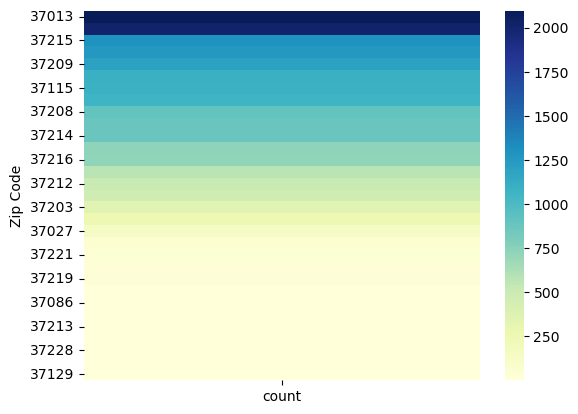

In [179]:
sns.heatmap(heat_map_zip,cmap="YlGnBu")
plt.show()